In [1]:
import pandas as pd
import numpy as np
import covsirphy as cvp

In [2]:
df = pd.read_csv('data_us.csv')

In [3]:
df.tail()

,Unnamed: 0,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Population,Susceptiple,Log susceptiple,Decresed susceptiple
168,168,2020-07-08,3054699,132300,953462,1968937,58601,820,16986,338752267,335697568,19.631721,58601
169,169,2020-07-09,3117946,133290,969111,2015545,63247,990,15649,338752267,335634321,19.631533,63247
170,170,2020-07-10,3184573,134092,983185,2067296,66627,802,14074,338752267,335567694,19.631334,66627
171,171,2020-07-11,3245925,134777,995576,2115572,61352,685,12391,338752267,335506342,19.631151,61352
172,172,2020-07-12,3304942,135205,1006326,2163411,59017,428,10750,338752267,335447325,19.630975,59017


In [9]:
data_cols = ['Deaths', 'Recovered', 'Active', 'Log susceptiple']

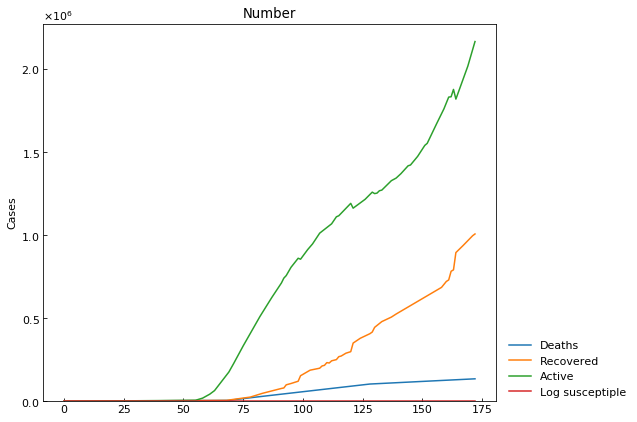

In [10]:
cvp.line_plot(df[data_cols], 'Number')

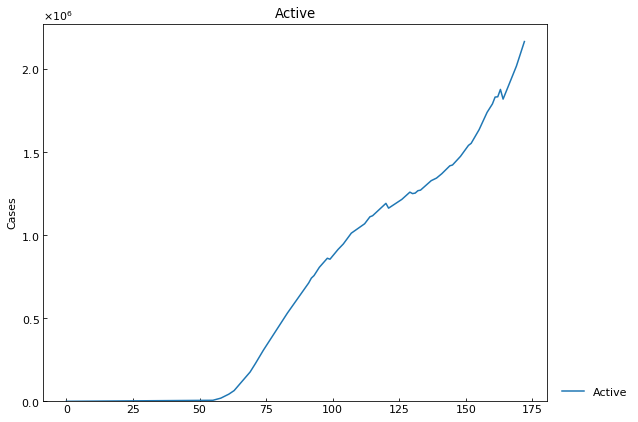

In [11]:
cvp.line_plot(df['Active'], 'Active')

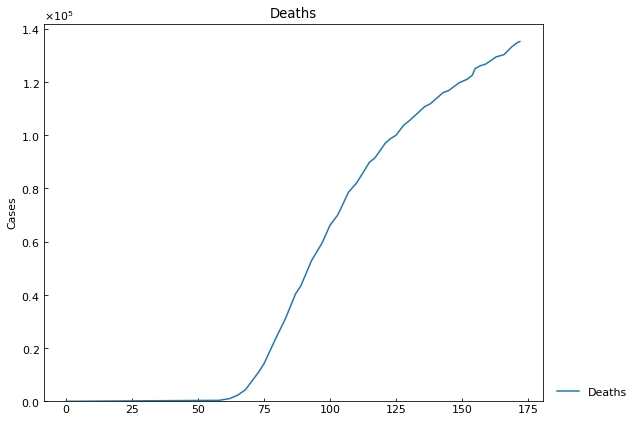

In [12]:
cvp.line_plot(df['Deaths'], 'Deaths')

In [27]:
eg_population, s0, i0, r0, d0 = df['Population'][0], df['Susceptiple'][0], df['Active'][0], df['Recovered'][0], df['Deaths'][0]

In [28]:
print(eg_population, s0, i0, r0, d0)

338752267 338752266 1 0 0


In [31]:
eg_r0, eg_kappa, eg_rho = (2.5, 0.005, 0.2)
eg_sigma = eg_rho / eg_r0 - eg_kappa
eg_initials = (0.999, 0.001, 0, 0)

In [32]:
sird_param_dict = {
    "kappa": eg_kappa, "rho": eg_rho, "sigma": eg_sigma
}
sird_simulator = cvp.ODESimulator(country="Example", province="SIR-D")
sird_simulator.add(
    model=cvp.SIRD, step_n=180, population=eg_population,
    param_dict=sird_param_dict,
    y0_dict={"Susceptible": s0, "Infected": i0, "Recovered": r0, "Fatal": d0}
)
sird_simulator.run()
sird_simulator.non_dim().tail()

,t,x,y,z,w
176,176,0.267122,0.206027,0.493922,0.032928
177,177,0.256482,0.200407,0.509167,0.033944
178,178,0.246553,0.194536,0.523979,0.034932
179,179,0.237293,0.188473,0.538344,0.035890
180,180,0.228660,0.182276,0.552247,0.036816


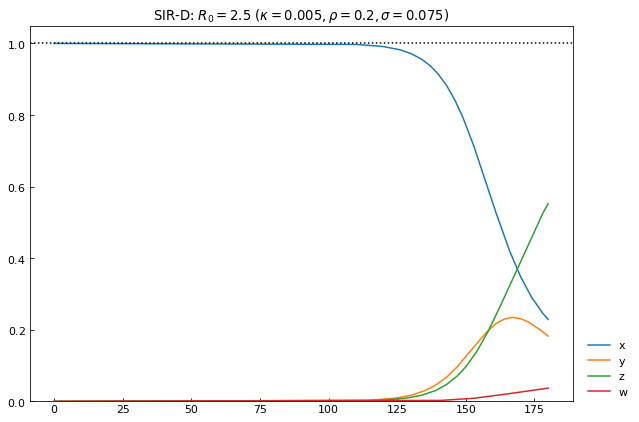

In [33]:
cvp.line_plot(
    sird_simulator.non_dim().set_index("t"),
    title=r"SIR-D: $R_0={0}\ (\kappa={1}, \rho={2}, \sigma={3})$".format(eg_r0, eg_kappa, eg_rho, eg_sigma),
    ylabel="",
    h=1
)


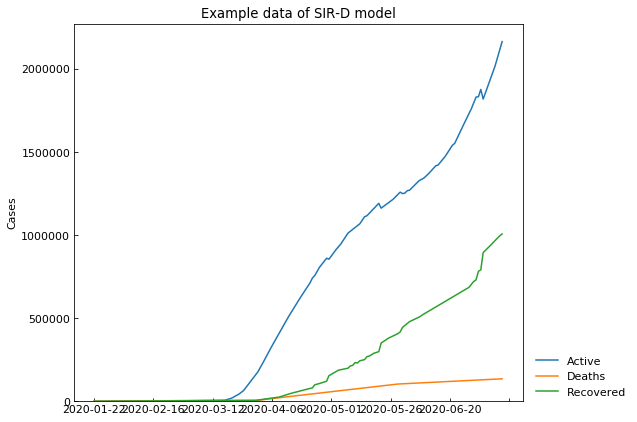

,Unnamed: 0,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Population,Susceptiple,Log susceptiple,Decresed susceptiple
168,168,2020-07-08,3054699,132300,953462,1968937,58601,820,16986,338752267,335697568,19.631721,58601
169,169,2020-07-09,3117946,133290,969111,2015545,63247,990,15649,338752267,335634321,19.631533,63247
170,170,2020-07-10,3184573,134092,983185,2067296,66627,802,14074,338752267,335567694,19.631334,66627
171,171,2020-07-11,3245925,134777,995576,2115572,61352,685,12391,338752267,335506342,19.631151,61352
172,172,2020-07-12,3304942,135205,1006326,2163411,59017,428,10750,338752267,335447325,19.630975,59017


In [38]:
cvp.line_plot(
    df.set_index("Date")[["Active", "Deaths", "Recovered"]],
    "Example data of SIR-D model",
    h=eg_population, y_integer=True
)
df.tail()